In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

In [2]:
xls = pd.ExcelFile('Sports Data.xlsx')
df = pd.read_excel(xls, 'Sports data for DSBA')
df.head()

,Game_number,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,...,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
0,Game_1,Loss,18.0,Day,ODI,3.0,1,3.0,Bowling,Srilanka,...,13.0,3,0.0,2,3.0,6.0,0,54.0,3,1
1,Game_2,Win,24.0,Day,T20,3.0,1,4.0,Batting,Zimbabwe,...,12.0,1,0.0,0,3.0,6.0,0,69.0,2,1
2,Game_3,Loss,24.0,Day and Night,T20,3.0,1,2.0,Bowling,Zimbabwe,...,14.0,4,0.0,0,3.0,6.0,0,69.0,3,1
3,Game_4,Win,24.0,NaN,ODI,2.0,1,2.0,Bowling,Kenya,...,15.0,4,0.0,2,3.0,6.0,0,73.0,3,1
4,Game_5,Loss,24.0,Night,ODI,1.0,1,3.0,Bowling,Srilanka,...,12.0,4,0.0,0,3.0,6.0,0,80.0,3,1


In [3]:
df['player_highest_wicket'] = df['player_highest_wicket'].replace('Three', 3)
df['Players_scored_zero'] = df['Players_scored_zero'].replace('Three', 3)
df['First_selection'] = df['First_selection'].replace('Bat', 'Batting')

In [4]:
df['player_highest_wicket'] = df['player_highest_wicket'].astype(int)
df['Players_scored_zero'] = df['Players_scored_zero'].astype(int)
df = df.dropna()

In [5]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature]).codes

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import time

In [12]:
y= df[['Result']]

X = df

In [13]:
bestfeatures = SelectKBest(score_func=f_regression, k='all')
fit = bestfeatures.fit(X,y['Result'])
pd.DataFrame({'Column':X.columns,'Score':fit.scores_})

C:\Users\91996\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\Users\91996\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:307: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom


,Column,Score
0,Game_number,3.980615e+00
1,Result,3.907739e+17
2,Avg_team_Age,5.005308e+01
3,Match_light_type,5.666971e-03
4,Match_format,1.322565e+01
5,Bowlers_in_team,1.332226e+00
6,Wicket_keeper_in_team,NaN
7,All_rounder_in_team,1.627810e+01
8,First_selection,1.689309e+00
9,Opponent,3.310386e+01


In [14]:
start_time = time.time()
forest = rf()
forest.fit(X,y['Result'])
result = permutation_importance(
    forest, X, y['Result'], n_repeats=10, random_state=42, n_jobs=1
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=X.columns)
forest_importances.sort_values(ascending=False,inplace=True)
forest_importances.to_csv('../results/important_features.csv')

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

NameError: name 'rf' is not defined

In [49]:
xls = pd.ExcelFile('Sports Data.xlsx')
data = pd.read_excel(xls, 'Sports data for DSBA')
data.head()

,Game_number,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,...,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
0,Game_1,Loss,18.0,Day,ODI,3.0,1,3.0,Bowling,Srilanka,...,13.0,3,0.0,2,3.0,6.0,0,54.0,3,1
1,Game_2,Win,24.0,Day,T20,3.0,1,4.0,Batting,Zimbabwe,...,12.0,1,0.0,0,3.0,6.0,0,69.0,2,1
2,Game_3,Loss,24.0,Day and Night,T20,3.0,1,2.0,Bowling,Zimbabwe,...,14.0,4,0.0,0,3.0,6.0,0,69.0,3,1
3,Game_4,Win,24.0,NaN,ODI,2.0,1,2.0,Bowling,Kenya,...,15.0,4,0.0,2,3.0,6.0,0,73.0,3,1
4,Game_5,Loss,24.0,Night,ODI,1.0,1,3.0,Bowling,Srilanka,...,12.0,4,0.0,0,3.0,6.0,0,80.0,3,1


In [50]:
data.isnull().sum()

Game_number                0
Result                     0
Avg_team_Age              97
Match_light_type          52
Match_format              70
Bowlers_in_team           82
Wicket_keeper_in_team      0
All_rounder_in_team       40
First_selection           59
Opponent                  36
Season                    62
Audience_number           81
Offshore                  64
Max_run_scored_1over      28
Max_wicket_taken_1over     0
Extra_bowls_bowled        29
Min_run_given_1over        0
Min_run_scored_1over      27
Max_run_given_1over       34
extra_bowls_opponent       0
player_highest_run        28
Players_scored_zero        0
player_highest_wicket      0
dtype: int64

In [51]:
xls = pd.ExcelFile('Sports Data.xlsx')
test = pd.read_excel(xls, 'Sports data for DSBA')
test.isnull().sum()

Game_number                0
Result                     0
Avg_team_Age              97
Match_light_type          52
Match_format              70
Bowlers_in_team           82
Wicket_keeper_in_team      0
All_rounder_in_team       40
First_selection           59
Opponent                  36
Season                    62
Audience_number           81
Offshore                  64
Max_run_scored_1over      28
Max_wicket_taken_1over     0
Extra_bowls_bowled        29
Min_run_given_1over        0
Min_run_scored_1over      27
Max_run_given_1over       34
extra_bowls_opponent       0
player_highest_run        28
Players_scored_zero        0
player_highest_wicket      0
dtype: int64

In [52]:
data['player_highest_wicket'] = data['player_highest_wicket'].replace('Three', 3)
data['Players_scored_zero'] = data['Players_scored_zero'].replace('Three', 3)
data['First_selection'] = data['First_selection'].replace('Bat', 'Batting')

In [53]:
data['player_highest_wicket'] = data['player_highest_wicket'].astype(int)
data['Players_scored_zero'] = data['Players_scored_zero'].astype(int)
data = data.dropna()

In [54]:
Result_map = {'Win': 1, 'Loss': 0}
data['Result'] = data['Result'].map(Result_map)

In [55]:
y = data.pop('Result')
X = data.drop('Game_number',axis = 1)

In [56]:
seed = 50  # so that the result is reproducible
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.333, random_state = seed)

In [57]:
X_train = X_train.fillna('na')
X_test = X_test.fillna('na')

In [58]:
X_train.dtypes

Avg_team_Age              float64
Match_light_type           object
Match_format               object
Bowlers_in_team           float64
Wicket_keeper_in_team       int64
All_rounder_in_team       float64
First_selection            object
Opponent                   object
Season                     object
Audience_number           float64
Offshore                   object
Max_run_scored_1over      float64
Max_wicket_taken_1over      int64
Extra_bowls_bowled        float64
Min_run_given_1over         int64
Min_run_scored_1over      float64
Max_run_given_1over       float64
extra_bowls_opponent        int64
player_highest_run        float64
Players_scored_zero         int32
player_highest_wicket       int32
dtype: object

In [59]:
features_to_encode = list(X_train.select_dtypes(include = ['object']).columns) 
# Or alternatively, 
features_to_encode = X_train.columns[X_train.dtypes==object].tolist() 

In [60]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
col_trans = make_column_transformer(
                        (OneHotEncoder(),features_to_encode),
                        remainder = "passthrough"
                        )

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(
                      min_samples_leaf=50,
                      n_estimators=150,
                      bootstrap=True,
                      oob_score=True,
                      n_jobs=-1,
                      random_state=seed,
                      max_features='auto')

In [62]:
for col in X_train:
    print(f'{col}: {X_train[col].unique()}')

Avg_team_Age: [30. 25. 29. 26. 24. 28. 27. 12. 17. 18.]
Match_light_type: ['Day' 'Day and Night' 'Night']
Match_format: ['ODI' 'T20' 'Test' '20-20']
Bowlers_in_team: [4. 1. 2. 3. 5.]
Wicket_keeper_in_team: [1]
All_rounder_in_team: [4. 3. 2. 1.]
First_selection: ['Bowling' 'Batting']
Opponent: ['Pakistan' 'Zimbabwe' 'West Indies' 'South Africa' 'Kenya' 'Srilanka'
 'Bangladesh' 'England' 'Australia']
Season: ['Winter' 'Summer' 'Rainy']
Audience_number: [65772.  7826. 68005. ... 19362. 20545. 23233.]
Offshore: ['No' 'Yes']
Max_run_scored_1over: [16. 14. 13. 17. 12. 20. 22. 11. 15. 24. 18. 19. 21. 23. 25.]
Max_wicket_taken_1over: [3 4 2 1]
Extra_bowls_bowled: [17.  1.  9. 20.  8.  5.  4. 15.  7. 21.  6. 22. 10.  2.  3. 14. 28. 25.
 12. 18. 23.  0. 32. 13. 19. 34. 11. 16. 24. 27. 36. 30. 29. 31. 26. 33.
 35. 40. 38. 37.]
Min_run_given_1over: [3 0 2 4 6 1 5]
Min_run_scored_1over: [3. 2. 1. 4.]
Max_run_given_1over: [ 6.  7. 18. 13. 10. 14. 15.  8. 23.  9. 21. 16. 33. 11. 20. 22. 36. 31.
 17. 

In [63]:
X_train.dtypes

Avg_team_Age              float64
Match_light_type           object
Match_format               object
Bowlers_in_team           float64
Wicket_keeper_in_team       int64
All_rounder_in_team       float64
First_selection            object
Opponent                   object
Season                     object
Audience_number           float64
Offshore                   object
Max_run_scored_1over      float64
Max_wicket_taken_1over      int64
Extra_bowls_bowled        float64
Min_run_given_1over         int64
Min_run_scored_1over      float64
Max_run_given_1over       float64
extra_bowls_opponent        int64
player_highest_run        float64
Players_scored_zero         int32
player_highest_wicket       int32
dtype: object

In [64]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(col_trans, rf_classifier)
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Match_light_type',
                                                   'Match_format',
                                                   'First_selection',
                                                   'Opponent', 'Season',
                                                   'Offshore'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(min_samples_leaf=50, n_estimators=150,
                                        n_jobs=-1, oob_score=True,
                                        random_state=50))])

In [65]:
y_pred = pipe.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score

In [67]:
accuracy_score(y_test, y_pred)
print(f"The accuracy of the model is {round(accuracy_score(y_test,y_pred),3)*100} %")

The accuracy of the model is 85.39999999999999 %


In [68]:
train_probs = pipe.predict_proba(X_train)[:,1] 
probs = pipe.predict_proba(X_test)[:, 1]
train_predictions = pipe.predict(X_train)

In [69]:
print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, probs)}')

Train ROC AUC Score: 0.8365042228335198
Test ROC AUC  Score: 0.8114556782781082


In [213]:
def evaluate_model(y_pred, probs,train_predictions, train_probs):
    baseline = {}
    baseline['recall']=recall_score(y_test,
                    [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test,
                    [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    results = {}
    results['recall'] = recall_score(y_test, y_pred)
    results['precision'] = precision_score(y_test, y_pred)
    results['roc'] = roc_auc_score(y_test, probs)
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    for metric in ['recall', 'precision', 'roc']:  
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}') 
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)
    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate');
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
    plt.show();

Recall Baseline: 1.0 Test: 1.0 Train: 1.0
Precision Baseline: 0.85 Test: 0.85 Train: 0.83
Roc Baseline: 0.5 Test: 0.81 Train: 0.84


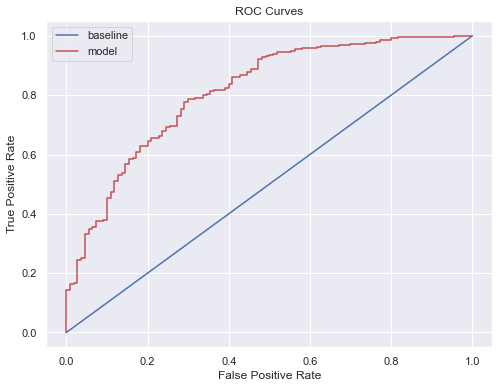

In [214]:
evaluate_model(y_pred,probs,train_predictions,train_probs)


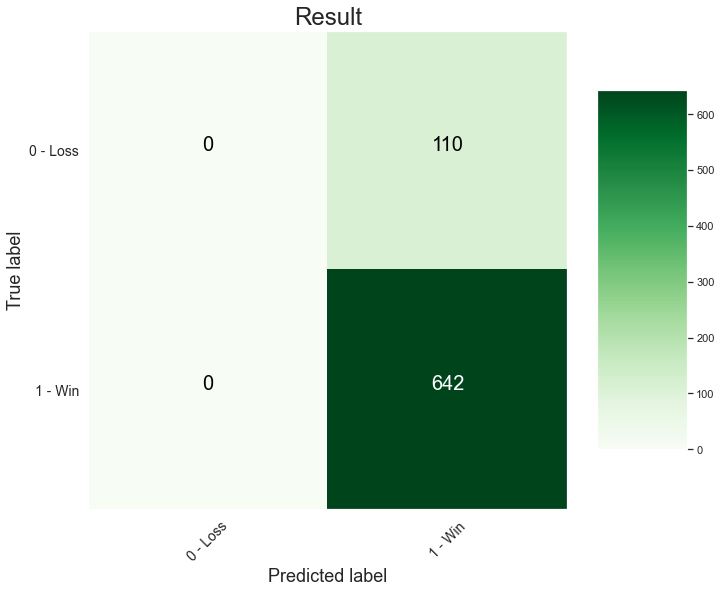

In [115]:
import itertools
def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens): # can change color 
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), 
             fontsize = 20,
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

# Let's plot it out
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['0 - Loss', '1 - Win'],
                      title = 'Result')


In [86]:
print(rf_classifier.feature_importances_)
print(f" There are {len(rf_classifier.feature_importances_)} features in total")

[2.67202648e-03 1.47304081e-02 1.05948093e-03 0.00000000e+00
 1.12340091e-02 6.69747596e-03 0.00000000e+00 5.05993587e-03
 2.89906361e-03 0.00000000e+00 8.25045668e-04 4.74484841e-05
 6.16944304e-03 2.20587009e-04 8.82894212e-03 9.39339717e-03
 5.06059073e-04 3.60106899e-03 1.55219988e-02 5.23656138e-02
 6.39601294e-03 1.40368670e-01 1.53617676e-01 2.47166392e-02
 6.16558657e-03 0.00000000e+00 1.83122293e-02 1.71165170e-01
 1.39566896e-02 6.65851811e-03 9.88666296e-02 1.97038406e-02
 8.76327270e-03 2.36150451e-02 6.32251374e-02 2.09408238e-02
 1.26822427e-02 6.90138135e-02]
 There are 38 features in total


In [87]:
# Let's look at the first row
print(col_trans.fit_transform(X_train)[0,:])

[1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 1.0000e+00 1.0000e+00 0.0000e+00 3.0000e+01
 4.0000e+00 1.0000e+00 4.0000e+00 6.5772e+04 1.6000e+01 3.0000e+00
 1.7000e+01 3.0000e+00 3.0000e+00 6.0000e+00 2.0000e+00 9.7000e+01
 3.0000e+00 3.0000e+00]


In [88]:
# And the first row of X_train
X_train.iloc[0,:]   

Avg_team_Age                  30.0
Match_light_type               Day
Match_format                   ODI
Bowlers_in_team                4.0
Wicket_keeper_in_team            1
All_rounder_in_team            4.0
First_selection            Bowling
Opponent                  Pakistan
Season                      Winter
Audience_number            65772.0
Offshore                        No
Max_run_scored_1over          16.0
Max_wicket_taken_1over           3
Extra_bowls_bowled            17.0
Min_run_given_1over              3
Min_run_scored_1over           3.0
Max_run_given_1over            6.0
extra_bowls_opponent             2
player_highest_run            97.0
Players_scored_zero              3
player_highest_wicket            3
Name: 818, dtype: object

In [89]:
def encode_and_bind(original_dataframe, features_to_encode):
    dummies = pd.get_dummies(original_dataframe[features_to_encode])
    res = pd.concat([dummies, original_dataframe], axis=1)
    res = res.drop(features_to_encode, axis=1)
    return(res)
X_train_encoded = encode_and_bind(X_train, features_to_encode)

In [90]:
feature_importances = list(zip(X_train_encoded, rf_classifier.feature_importances_))
# Then sort the feature importances by most important first
feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_ranked];

Feature: Audience_number                     Importance: 0.17116516962404327
Feature: Offshore_Yes                        Importance: 0.15361767556023634
Feature: Offshore_No                         Importance: 0.1403686695350206
Feature: Extra_bowls_bowled                  Importance: 0.09886662960757292
Feature: player_highest_wicket               Importance: 0.06901381351662442
Feature: extra_bowls_opponent                Importance: 0.06322513737050402
Feature: Season_Summer                       Importance: 0.05236561378056523
Feature: Avg_team_Age                        Importance: 0.024716639212432407
Feature: Max_run_given_1over                 Importance: 0.023615045076155566
Feature: player_highest_run                  Importance: 0.020940823844460117
Feature: Min_run_given_1over                 Importance: 0.01970384061395972
Feature: All_rounder_in_team                 Importance: 0.018312229259774878
Feature: Season_Rainy                        Importance: 0.01552199880350

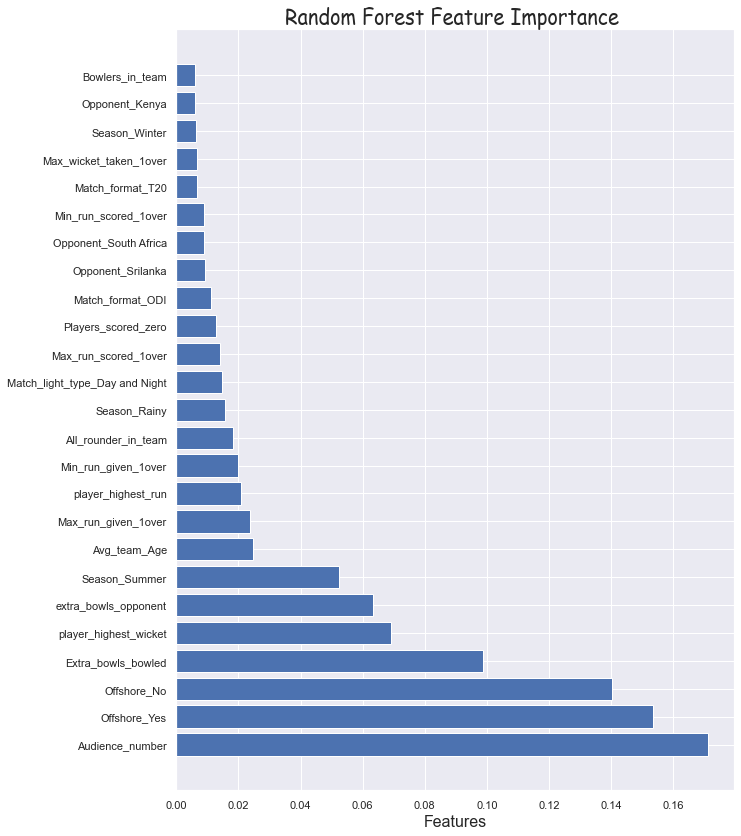

In [116]:
#Plot the top 25 feature importance
feature_names_25 = [i[0] for i in feature_importances_ranked[:25]]
y_ticks = np.arange(0, len(feature_names_25))
x_axis = [i[1] for i in feature_importances_ranked[:25]]
plt.figure(figsize = (10, 14))
plt.barh(feature_names_25, x_axis)   #horizontal barplot
plt.title('Random Forest Feature Importance ',
          fontdict= {'fontname':'Comic Sans MS','fontsize' : 20})
plt.xlabel('Features',fontdict= {'fontsize' : 16})
plt.show()

In [93]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf_classifier.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 50,
 'verbose': 0,
 'warm_start': False}


In [95]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 700, num = 50)]
max_features = ['auto', 'log2']  # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]   # Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10]  # Minimum number of samples required to split a node
min_samples_leaf = [1, 4, 10]    # Minimum number of samples required at each leaf node
bootstrap = [True, False]       # Method of selecting samples for training each tree
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
               'bootstrap': bootstrap}

In [96]:
# Create base model to tune
rf = RandomForestClassifier(oob_score=True)
# Create random search model and fit the data
rf_random = RandomizedSearchCV(
                        estimator = rf,
                        param_distributions = random_grid,
                        n_iter = 100, cv = 3,
                        verbose=2, random_state=seed, 
                        scoring='roc_auc')
rf_random.fit(X_train_encoded, y_train)
rf_random.best_params_
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=110, max_features=log2, max_leaf_nodes=49, min_samples_leaf=4, min_samples_split=5, n_estimators=565; total time=   0.0s
[CV] END bootstrap=False, max_depth=110, max_features=log2, max_leaf_nodes=49, min_samples_leaf=4, min_samples_split=5, n_estimators=565; total time=   0.0s
[CV] END bootstrap=False, max_depth=110, max_features=log2, max_leaf_nodes=49, min_samples_leaf=4, min_samples_split=5, n_estimators=565; total time=   0.0s


C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda

[CV] END bootstrap=True, max_depth=30, max_features=log2, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=2, n_estimators=467; total time=   0.7s
[CV] END bootstrap=True, max_depth=30, max_features=log2, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=2, n_estimators=467; total time=   0.8s
[CV] END bootstrap=True, max_depth=30, max_features=log2, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=2, n_estimators=467; total time=   0.8s
[CV] END bootstrap=False, max_depth=30, max_features=auto, max_leaf_nodes=48, min_samples_leaf=1, min_samples_split=10, n_estimators=161; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, max_leaf_nodes=48, min_samples_leaf=1, min_samples_split=10, n_estimators=161; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, max_leaf_nodes=48, min_samples_leaf=1, min_samples_split=10, n_estimators=161; total time=   0.0s


C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda

[CV] END bootstrap=True, max_depth=20, max_features=log2, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=10, n_estimators=675; total time=   1.0s
[CV] END bootstrap=True, max_depth=20, max_features=log2, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=10, n_estimators=675; total time=   1.0s
[CV] END bootstrap=True, max_depth=20, max_features=log2, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=10, n_estimators=675; total time=   1.2s
[CV] END bootstrap=False, max_depth=30, max_features=log2, max_leaf_nodes=44, min_samples_leaf=4, min_samples_split=2, n_estimators=577; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=log2, max_leaf_nodes=44, min_samples_leaf=4, min_samples_split=2, n_estimators=577; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=log2, max_leaf_nodes=44, min_samples_leaf=4, min_samples_split=2, n_estimators=577; total time=   0.0s


C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda

[CV] END bootstrap=True, max_depth=60, max_features=auto, max_leaf_nodes=39, min_samples_leaf=10, min_samples_split=5, n_estimators=148; total time=   0.2s
[CV] END bootstrap=True, max_depth=60, max_features=auto, max_leaf_nodes=39, min_samples_leaf=10, min_samples_split=5, n_estimators=148; total time=   0.2s
[CV] END bootstrap=True, max_depth=60, max_features=auto, max_leaf_nodes=39, min_samples_leaf=10, min_samples_split=5, n_estimators=148; total time=   0.2s
[CV] END bootstrap=False, max_depth=60, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2, n_estimators=565; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2, n_estimators=565; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2, n_estimators=565; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=auto, max_l

C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda

[CV] END bootstrap=True, max_depth=50, max_features=log2, max_leaf_nodes=16, min_samples_leaf=10, min_samples_split=5, n_estimators=565; total time=   0.9s
[CV] END bootstrap=True, max_depth=50, max_features=log2, max_leaf_nodes=16, min_samples_leaf=10, min_samples_split=5, n_estimators=565; total time=   0.9s
[CV] END bootstrap=True, max_depth=50, max_features=log2, max_leaf_nodes=16, min_samples_leaf=10, min_samples_split=5, n_estimators=565; total time=   0.9s
[CV] END bootstrap=False, max_depth=40, max_features=auto, max_leaf_nodes=14, min_samples_leaf=10, min_samples_split=5, n_estimators=626; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, max_leaf_nodes=14, min_samples_leaf=10, min_samples_split=5, n_estimators=626; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, max_leaf_nodes=14, min_samples_leaf=10, min_samples_split=5, n_estimators=626; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=log2, ma

C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda

[CV] END bootstrap=True, max_depth=100, max_features=auto, max_leaf_nodes=35, min_samples_leaf=10, min_samples_split=2, n_estimators=259; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=auto, max_leaf_nodes=35, min_samples_leaf=10, min_samples_split=2, n_estimators=259; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=auto, max_leaf_nodes=35, min_samples_leaf=10, min_samples_split=2, n_estimators=259; total time=   0.4s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=48, min_samples_leaf=10, min_samples_split=10, n_estimators=589; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=48, min_samples_leaf=10, min_samples_split=10, n_estimators=589; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=48, min_samples_leaf=10, min_samples_split=10, n_estimators=589; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=au

C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda

[CV] END bootstrap=True, max_depth=20, max_features=log2, max_leaf_nodes=44, min_samples_leaf=1, min_samples_split=2, n_estimators=161; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=log2, max_leaf_nodes=44, min_samples_leaf=1, min_samples_split=2, n_estimators=161; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=log2, max_leaf_nodes=44, min_samples_leaf=1, min_samples_split=2, n_estimators=161; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=auto, max_leaf_nodes=31, min_samples_leaf=1, min_samples_split=5, n_estimators=369; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=auto, max_leaf_nodes=31, min_samples_leaf=1, min_samples_split=5, n_estimators=369; total time=   0.7s
[CV] END bootstrap=True, max_depth=100, max_features=auto, max_leaf_nodes=31, min_samples_leaf=1, min_samples_split=5, n_estimators=369; total time=   0.6s
[CV] END bootstrap=True, max_depth=90, max_features=log2, max_leaf_

C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda

[CV] END bootstrap=True, max_depth=10, max_features=auto, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=5, n_estimators=638; total time=   1.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=5, n_estimators=638; total time=   1.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, max_leaf_nodes=16, min_samples_leaf=4, min_samples_split=5, n_estimators=638; total time=   0.9s
[CV] END bootstrap=True, max_depth=100, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_samples_split=2, n_estimators=210; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_samples_split=2, n_estimators=210; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_samples_split=2, n_estimators=210; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, max_features=log2, max_l

C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda

[CV] END bootstrap=True, max_depth=80, max_features=auto, max_leaf_nodes=31, min_samples_leaf=10, min_samples_split=2, n_estimators=491; total time=   0.8s
[CV] END bootstrap=True, max_depth=80, max_features=auto, max_leaf_nodes=31, min_samples_leaf=10, min_samples_split=2, n_estimators=491; total time=   0.9s
[CV] END bootstrap=True, max_depth=80, max_features=auto, max_leaf_nodes=31, min_samples_leaf=10, min_samples_split=2, n_estimators=491; total time=   0.8s
[CV] END bootstrap=True, max_depth=110, max_features=auto, max_leaf_nodes=41, min_samples_leaf=4, min_samples_split=5, n_estimators=259; total time=   0.4s
[CV] END bootstrap=True, max_depth=110, max_features=auto, max_leaf_nodes=41, min_samples_leaf=4, min_samples_split=5, n_estimators=259; total time=   0.4s
[CV] END bootstrap=True, max_depth=110, max_features=auto, max_leaf_nodes=41, min_samples_leaf=4, min_samples_split=5, n_estimators=259; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=auto, max_l

C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda

[CV] END bootstrap=True, max_depth=50, max_features=auto, max_leaf_nodes=42, min_samples_leaf=10, min_samples_split=2, n_estimators=442; total time=   0.7s
[CV] END bootstrap=True, max_depth=50, max_features=auto, max_leaf_nodes=42, min_samples_leaf=10, min_samples_split=2, n_estimators=442; total time=   0.8s
[CV] END bootstrap=True, max_depth=50, max_features=auto, max_leaf_nodes=42, min_samples_leaf=10, min_samples_split=2, n_estimators=442; total time=   0.8s
[CV] END bootstrap=True, max_depth=20, max_features=log2, max_leaf_nodes=48, min_samples_leaf=1, min_samples_split=10, n_estimators=210; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, max_features=log2, max_leaf_nodes=48, min_samples_leaf=1, min_samples_split=10, n_estimators=210; total time=   0.4s
[CV] END bootstrap=True, max_depth=20, max_features=log2, max_leaf_nodes=48, min_samples_leaf=1, min_samples_split=10, n_estimators=210; total time=   0.3s
[CV] END bootstrap=True, max_depth=70, max_features=auto, max_le

C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda

[CV] END bootstrap=True, max_depth=20, max_features=auto, max_leaf_nodes=43, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=auto, max_leaf_nodes=43, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=auto, max_leaf_nodes=43, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=auto, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=5, n_estimators=381; total time=   0.6s
[CV] END bootstrap=True, max_depth=110, max_features=auto, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=5, n_estimators=381; total time=   0.6s
[CV] END bootstrap=True, max_depth=110, max_features=auto, max_leaf_nodes=18, min_samples_leaf=4, min_samples_split=5, n_estimators=381; total time=   0.6s
[CV] END bootstrap=True, max_depth=40, max_features=log2, max_le

C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda

[CV] END bootstrap=True, max_depth=20, max_features=auto, max_leaf_nodes=36, min_samples_leaf=1, min_samples_split=2, n_estimators=246; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, max_features=auto, max_leaf_nodes=36, min_samples_leaf=1, min_samples_split=2, n_estimators=246; total time=   0.4s
[CV] END bootstrap=True, max_depth=20, max_features=auto, max_leaf_nodes=36, min_samples_leaf=1, min_samples_split=2, n_estimators=246; total time=   0.4s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=19, min_samples_leaf=4, min_samples_split=5, n_estimators=626; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=19, min_samples_leaf=4, min_samples_split=5, n_estimators=626; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=19, min_samples_leaf=4, min_samples_split=5, n_estimators=626; total time=   0.0s


C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda

[CV] END bootstrap=True, max_depth=20, max_features=auto, max_leaf_nodes=45, min_samples_leaf=1, min_samples_split=2, n_estimators=210; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, max_features=auto, max_leaf_nodes=45, min_samples_leaf=1, min_samples_split=2, n_estimators=210; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, max_features=auto, max_leaf_nodes=45, min_samples_leaf=1, min_samples_split=2, n_estimators=210; total time=   0.3s
[CV] END bootstrap=False, max_depth=30, max_features=auto, max_leaf_nodes=45, min_samples_leaf=1, min_samples_split=2, n_estimators=393; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, max_leaf_nodes=45, min_samples_leaf=1, min_samples_split=2, n_estimators=393; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, max_leaf_nodes=45, min_samples_leaf=1, min_samples_split=2, n_estimators=393; total time=   0.0s


C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda

[CV] END bootstrap=True, max_depth=50, max_features=log2, max_leaf_nodes=42, min_samples_leaf=4, min_samples_split=5, n_estimators=271; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=log2, max_leaf_nodes=42, min_samples_leaf=4, min_samples_split=5, n_estimators=271; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=log2, max_leaf_nodes=42, min_samples_leaf=4, min_samples_split=5, n_estimators=271; total time=   0.4s
[CV] END bootstrap=False, max_depth=70, max_features=log2, max_leaf_nodes=23, min_samples_leaf=4, min_samples_split=10, n_estimators=626; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=log2, max_leaf_nodes=23, min_samples_leaf=4, min_samples_split=10, n_estimators=626; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=log2, max_leaf_nodes=23, min_samples_leaf=4, min_samples_split=10, n_estimators=626; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=auto, max_

C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda

[CV] END bootstrap=True, max_depth=80, max_features=log2, max_leaf_nodes=27, min_samples_leaf=10, min_samples_split=2, n_estimators=197; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=log2, max_leaf_nodes=27, min_samples_leaf=10, min_samples_split=2, n_estimators=197; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=log2, max_leaf_nodes=27, min_samples_leaf=10, min_samples_split=2, n_estimators=197; total time=   0.3s
[CV] END bootstrap=False, max_depth=60, max_features=log2, max_leaf_nodes=32, min_samples_leaf=4, min_samples_split=10, n_estimators=687; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=log2, max_leaf_nodes=32, min_samples_leaf=4, min_samples_split=10, n_estimators=687; total time=   0.0s
[CV] END bootstrap=False, max_depth=60, max_features=log2, max_leaf_nodes=32, min_samples_leaf=4, min_samples_split=10, n_estimators=687; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=log2, ma

C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda

[CV] END bootstrap=True, max_depth=20, max_features=log2, max_leaf_nodes=19, min_samples_leaf=10, min_samples_split=5, n_estimators=687; total time=   1.0s
[CV] END bootstrap=True, max_depth=20, max_features=log2, max_leaf_nodes=19, min_samples_leaf=10, min_samples_split=5, n_estimators=687; total time=   1.2s
[CV] END bootstrap=True, max_depth=20, max_features=log2, max_leaf_nodes=19, min_samples_leaf=10, min_samples_split=5, n_estimators=687; total time=   1.1s
[CV] END bootstrap=False, max_depth=30, max_features=auto, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=2, n_estimators=589; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=2, n_estimators=589; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=2, n_estimators=589; total time=   0.0s


C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda

[CV] END bootstrap=True, max_depth=110, max_features=log2, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=2, n_estimators=222; total time=   0.3s
[CV] END bootstrap=True, max_depth=110, max_features=log2, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=2, n_estimators=222; total time=   0.3s
[CV] END bootstrap=True, max_depth=110, max_features=log2, max_leaf_nodes=14, min_samples_leaf=1, min_samples_split=2, n_estimators=222; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=auto, max_leaf_nodes=26, min_samples_leaf=1, min_samples_split=2, n_estimators=430; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=auto, max_leaf_nodes=26, min_samples_leaf=1, min_samples_split=2, n_estimators=430; total time=   0.7s
[CV] END bootstrap=True, max_depth=100, max_features=auto, max_leaf_nodes=26, min_samples_leaf=1, min_samples_split=2, n_estimators=430; total time=   0.7s
[CV] END bootstrap=True, max_depth=30, max_features=auto, max_le

C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda

[CV] END bootstrap=True, max_depth=60, max_features=log2, max_leaf_nodes=14, min_samples_leaf=10, min_samples_split=5, n_estimators=136; total time=   0.2s
[CV] END bootstrap=True, max_depth=60, max_features=log2, max_leaf_nodes=14, min_samples_leaf=10, min_samples_split=5, n_estimators=136; total time=   0.3s
[CV] END bootstrap=True, max_depth=60, max_features=log2, max_leaf_nodes=14, min_samples_leaf=10, min_samples_split=5, n_estimators=136; total time=   0.3s
[CV] END bootstrap=False, max_depth=100, max_features=log2, max_leaf_nodes=28, min_samples_leaf=10, min_samples_split=5, n_estimators=308; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=log2, max_leaf_nodes=28, min_samples_leaf=10, min_samples_split=5, n_estimators=308; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=log2, max_leaf_nodes=28, min_samples_leaf=10, min_samples_split=5, n_estimators=308; total time=   0.0s


C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda

[CV] END bootstrap=True, max_depth=None, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_samples_split=10, n_estimators=455; total time=   1.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_samples_split=10, n_estimators=455; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, max_features=log2, max_leaf_nodes=40, min_samples_leaf=1, min_samples_split=10, n_estimators=455; total time=   0.8s
[CV] END bootstrap=False, max_depth=100, max_features=auto, max_leaf_nodes=41, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=auto, max_leaf_nodes=41, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=auto, max_leaf_nodes=41, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   0.0s


C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda

[CV] END bootstrap=True, max_depth=60, max_features=log2, max_leaf_nodes=27, min_samples_leaf=4, min_samples_split=10, n_estimators=369; total time=   0.6s
[CV] END bootstrap=True, max_depth=60, max_features=log2, max_leaf_nodes=27, min_samples_leaf=4, min_samples_split=10, n_estimators=369; total time=   0.6s
[CV] END bootstrap=True, max_depth=60, max_features=log2, max_leaf_nodes=27, min_samples_leaf=4, min_samples_split=10, n_estimators=369; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=auto, max_leaf_nodes=46, min_samples_leaf=1, min_samples_split=10, n_estimators=565; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_features=auto, max_leaf_nodes=46, min_samples_leaf=1, min_samples_split=10, n_estimators=565; total time=   1.3s
[CV] END bootstrap=True, max_depth=100, max_features=auto, max_leaf_nodes=46, min_samples_leaf=1, min_samples_split=10, n_estimators=565; total time=   1.0s
[CV] END bootstrap=False, max_depth=70, max_features=log2, ma

C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda

[CV] END bootstrap=True, max_depth=None, max_features=auto, max_leaf_nodes=28, min_samples_leaf=4, min_samples_split=2, n_estimators=344; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_leaf_nodes=28, min_samples_leaf=4, min_samples_split=2, n_estimators=344; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_leaf_nodes=28, min_samples_leaf=4, min_samples_split=2, n_estimators=344; total time=   0.5s
[CV] END bootstrap=True, max_depth=80, max_features=auto, max_leaf_nodes=21, min_samples_leaf=10, min_samples_split=5, n_estimators=442; total time=   0.7s
[CV] END bootstrap=True, max_depth=80, max_features=auto, max_leaf_nodes=21, min_samples_leaf=10, min_samples_split=5, n_estimators=442; total time=   0.7s
[CV] END bootstrap=True, max_depth=80, max_features=auto, max_leaf_nodes=21, min_samples_leaf=10, min_samples_split=5, n_estimators=442; total time=   0.7s
[CV] END bootstrap=True, max_depth=100, max_features=auto, ma

C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda

[CV] END bootstrap=True, max_depth=20, max_features=log2, max_leaf_nodes=33, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=log2, max_leaf_nodes=33, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, max_features=log2, max_leaf_nodes=33, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=log2, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=10, n_estimators=602; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=log2, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=10, n_estimators=602; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=log2, max_leaf_nodes=14, min_samples_leaf=4, min_samples_split=10, n_estimators=602; total time=   0.0s


C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda

[CV] END bootstrap=True, max_depth=60, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_samples_split=10, n_estimators=516; total time=   0.9s
[CV] END bootstrap=True, max_depth=60, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_samples_split=10, n_estimators=516; total time=   0.9s
[CV] END bootstrap=True, max_depth=60, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_samples_split=10, n_estimators=516; total time=   1.0s
[CV] END bootstrap=False, max_depth=80, max_features=log2, max_leaf_nodes=40, min_samples_leaf=4, min_samples_split=2, n_estimators=528; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=log2, max_leaf_nodes=40, min_samples_leaf=4, min_samples_split=2, n_estimators=528; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=log2, max_leaf_nodes=40, min_samples_leaf=4, min_samples_split=2, n_estimators=528; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=auto, max_l

C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda

[CV] END bootstrap=True, max_depth=None, max_features=log2, max_leaf_nodes=21, min_samples_leaf=10, min_samples_split=2, n_estimators=259; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, max_features=log2, max_leaf_nodes=21, min_samples_leaf=10, min_samples_split=2, n_estimators=259; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, max_features=log2, max_leaf_nodes=21, min_samples_leaf=10, min_samples_split=2, n_estimators=259; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_samples_split=5, n_estimators=479; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_samples_split=5, n_estimators=479; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, max_features=log2, max_leaf_nodes=30, min_samples_leaf=1, min_samples_split=5, n_estimators=479; total time=   0.8s
[CV] END bootstrap=True, max_depth=100, max_features=lo

C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda

[CV] END bootstrap=True, max_depth=40, max_features=log2, max_leaf_nodes=25, min_samples_leaf=1, min_samples_split=5, n_estimators=614; total time=   0.9s
[CV] END bootstrap=True, max_depth=40, max_features=log2, max_leaf_nodes=25, min_samples_leaf=1, min_samples_split=5, n_estimators=614; total time=   0.9s
[CV] END bootstrap=True, max_depth=40, max_features=log2, max_leaf_nodes=25, min_samples_leaf=1, min_samples_split=5, n_estimators=614; total time=   0.9s
[CV] END bootstrap=True, max_depth=110, max_features=auto, max_leaf_nodes=15, min_samples_leaf=1, min_samples_split=5, n_estimators=173; total time=   0.2s
[CV] END bootstrap=True, max_depth=110, max_features=auto, max_leaf_nodes=15, min_samples_leaf=1, min_samples_split=5, n_estimators=173; total time=   0.3s
[CV] END bootstrap=True, max_depth=110, max_features=auto, max_leaf_nodes=15, min_samples_leaf=1, min_samples_split=5, n_estimators=173; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, max_features=auto, max_leaf

C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda

[CV] END bootstrap=True, max_depth=40, max_features=auto, max_leaf_nodes=46, min_samples_leaf=10, min_samples_split=5, n_estimators=112; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, max_features=auto, max_leaf_nodes=46, min_samples_leaf=10, min_samples_split=5, n_estimators=112; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, max_features=auto, max_leaf_nodes=46, min_samples_leaf=10, min_samples_split=5, n_estimators=112; total time=   0.1s


C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda

[CV] END bootstrap=False, max_depth=80, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_samples_split=2, n_estimators=222; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_samples_split=2, n_estimators=222; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_samples_split=2, n_estimators=222; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=log2, max_leaf_nodes=42, min_samples_leaf=1, min_samples_split=10, n_estimators=602; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=log2, max_leaf_nodes=42, min_samples_leaf=1, min_samples_split=10, n_estimators=602; total time=   0.0s
[CV] END bootstrap=False, max_depth=70, max_features=log2, max_leaf_nodes=42, min_samples_leaf=1, min_samples_split=10, n_estimators=602; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=log2, max

C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda

[CV] END bootstrap=True, max_depth=None, max_features=auto, max_leaf_nodes=24, min_samples_leaf=10, min_samples_split=5, n_estimators=479; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_leaf_nodes=24, min_samples_leaf=10, min_samples_split=5, n_estimators=479; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_leaf_nodes=24, min_samples_leaf=10, min_samples_split=5, n_estimators=479; total time=   0.8s
[CV] END bootstrap=True, max_depth=90, max_features=auto, max_leaf_nodes=44, min_samples_leaf=10, min_samples_split=5, n_estimators=259; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=auto, max_leaf_nodes=44, min_samples_leaf=10, min_samples_split=5, n_estimators=259; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=auto, max_leaf_nodes=44, min_samples_leaf=10, min_samples_split=5, n_estimators=259; total time=   0.4s
[CV] END bootstrap=False, max_depth=90, max_features=log2,

C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda

[CV] END bootstrap=True, max_depth=30, max_features=auto, max_leaf_nodes=36, min_samples_leaf=4, min_samples_split=10, n_estimators=136; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=auto, max_leaf_nodes=36, min_samples_leaf=4, min_samples_split=10, n_estimators=136; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=auto, max_leaf_nodes=36, min_samples_leaf=4, min_samples_split=10, n_estimators=136; total time=   0.2s
[CV] END bootstrap=False, max_depth=40, max_features=auto, max_leaf_nodes=48, min_samples_leaf=4, min_samples_split=2, n_estimators=516; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, max_leaf_nodes=48, min_samples_leaf=4, min_samples_split=2, n_estimators=516; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, max_leaf_nodes=48, min_samples_leaf=4, min_samples_split=2, n_estimators=516; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=log2, max_l

C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda

[CV] END bootstrap=True, max_depth=20, max_features=log2, max_leaf_nodes=19, min_samples_leaf=10, min_samples_split=5, n_estimators=234; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, max_features=log2, max_leaf_nodes=19, min_samples_leaf=10, min_samples_split=5, n_estimators=234; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, max_features=log2, max_leaf_nodes=19, min_samples_leaf=10, min_samples_split=5, n_estimators=234; total time=   0.3s
[CV] END bootstrap=False, max_depth=90, max_features=log2, max_leaf_nodes=36, min_samples_leaf=10, min_samples_split=10, n_estimators=161; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=log2, max_leaf_nodes=36, min_samples_leaf=10, min_samples_split=10, n_estimators=161; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=log2, max_leaf_nodes=36, min_samples_leaf=10, min_samples_split=10, n_estimators=161; total time=   0.0s


C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda

[CV] END bootstrap=True, max_depth=10, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_samples_split=10, n_estimators=638; total time=   1.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_samples_split=10, n_estimators=638; total time=   1.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_samples_split=10, n_estimators=638; total time=   1.0s


C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.81070192        nan 0.80089358        nan 0.8299376
        nan        nan        nan 0.81100476        nan        nan
        nan        nan 0.8329838         nan        nan        nan
 0.85848172 0.84237017 0.83296796        nan 0.8145486  0.8271253
        nan 0.83092182 0.85172002 0.83325052        nan 0.83245455
 0.8642219  0.84447534 0.84243565        nan 0.8301069  0.81557359
 0.80572216        nan        nan        nan 0.8473514         nan
 0.85734945        nan 0.84547559        nan        nan        nan
 0.8302698         nan        nan        nan 0.81652961        nan
 0.81468732 0.83679646 0.80554984        nan        nan 0.79875002
        nan 0.85591078        nan 0.83175037 0.85905565        nan
 0.83325863 0.81692669 0.84488443        nan 0.84513327        nan
 0.84138637        nan        nan        nan        nan

{'n_estimators': 210,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_leaf_nodes': 48,
 'max_features': 'log2',
 'max_depth': 20,
 'bootstrap': True}

In [97]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1)
rf_random = RandomizedSearchCV(
                estimator = rf,
                param_distributions = random_grid,
                n_iter = 50, cv = 3,
                verbose=1, random_state=seed,
                scoring='roc_auc')
pipe_random = make_pipeline(col_trans, rf_random)
pipe_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91996\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\91996\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91996\anaconda

{'n_estimators': 210,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_leaf_nodes': 48,
 'max_features': 'log2',
 'max_depth': 20,
 'bootstrap': True}

In [100]:
# To look at nodes and depths of trees use on average
n_nodes = []
max_depths = []
best_model = rf_random.best_estimator_
for ind_tree in best_model.estimators_:
       n_nodes.append(ind_tree.tree_.node_count)
       max_depths.append(ind_tree.tree_.max_depth)
print(f'Average number of nodes {int(np.mean(n_nodes))}')   
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 95
Average maximum depth 11


In [101]:
# Use the best model after tuning
best_model = rf_random.best_estimator_
pipe_best_model = make_pipeline(col_trans, best_model)
pipe_best_model.fit(X_train, y_train)
y_pred_best_model = pipe_best_model.predict(X_test)

In [102]:
train_rf_predictions = pipe_best_model.predict(X_train)
train_rf_probs = pipe_best_model.predict_proba(X_train)[:, 1]
rf_probs = pipe_best_model.predict_proba(X_test)[:, 1]
# Plot ROC curve and check scores
evaluate_model(y_pred_best_model, rf_probs, train_rf_predictions, train_rf_probs)

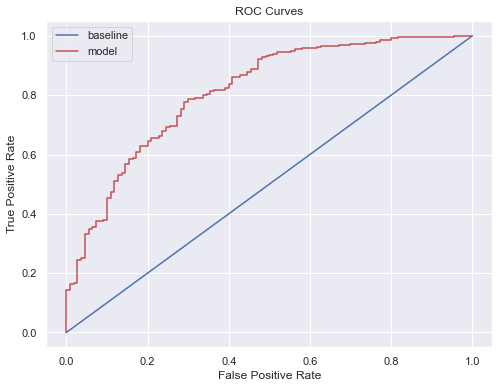

Recall Baseline: 1.0 Test: 1.0 Train: 1.0
Precision Baseline: 0.85 Test: 0.85 Train: 0.83
Roc Baseline: 0.5 Test: 0.81 Train: 0.84


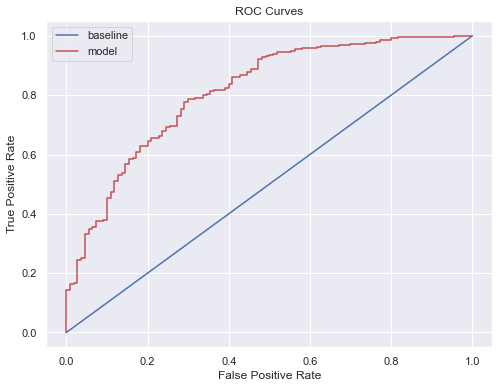

In [216]:
base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
model_fpr, model_tpr, _ = roc_curve(y_test, probs)
plt.figure(figsize = (8, 6))
plt.rcParams['font.size'] = 16
    # Plot both curves
plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
plt.plot(model_fpr, model_tpr, 'r', label = 'model')
plt.legend();
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
plt.show();
evaluate_model(y_pred,probs,train_predictions,train_probs)

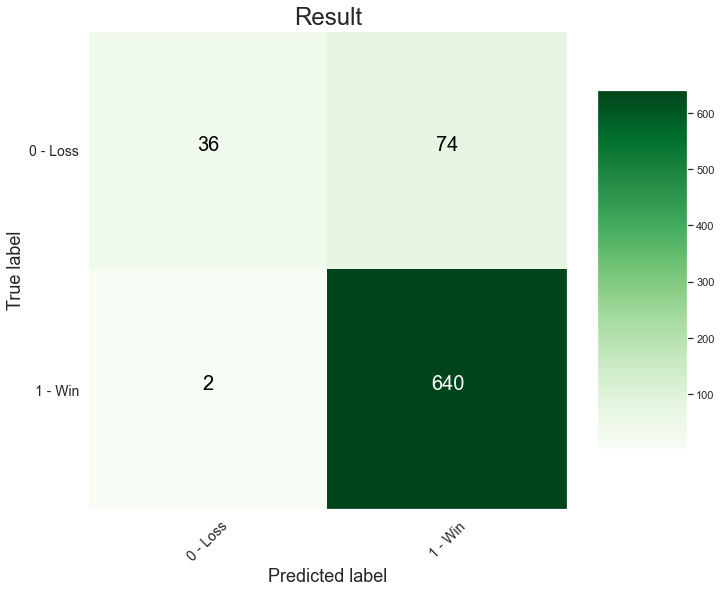

In [117]:
# Plot Confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred_best_model), classes = ['0 - Loss', '1 - Win'],
title = 'Result')

In [200]:
xls = pd.ExcelFile('Sports Data.xlsx')
test1= pd.read_excel(xls, 'Sports data for DSBA')
test1['player_highest_wicket'] = test1['player_highest_wicket'].replace('Three', 3)
test1['Players_scored_zero'] = test1['Players_scored_zero'].replace('Three', 3)
test1['First_selection'] = test1['First_selection'].replace('Bat', 'Batting')
test1['player_highest_wicket'] = test1['player_highest_wicket'].astype(int)
test1['Players_scored_zero'] = test1['Players_scored_zero'].astype(int)
test1 = test1.dropna()
test2 = test1.copy().drop('Game_number', axis = 1)
test_withoutID = test2.copy().drop('Result', axis=1)
test_withoutID = test_withoutID.dropna()


In [201]:
test_withoutID.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2258 entries, 0 to 2929
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Avg_team_Age            2258 non-null   float64
 1   Match_light_type        2258 non-null   object 
 2   Match_format            2258 non-null   object 
 3   Bowlers_in_team         2258 non-null   float64
 4   Wicket_keeper_in_team   2258 non-null   int64  
 5   All_rounder_in_team     2258 non-null   float64
 6   First_selection         2258 non-null   object 
 7   Opponent                2258 non-null   object 
 8   Season                  2258 non-null   object 
 9   Audience_number         2258 non-null   float64
 10  Offshore                2258 non-null   object 
 11  Max_run_scored_1over    2258 non-null   float64
 12  Max_wicket_taken_1over  2258 non-null   int64  
 13  Extra_bowls_bowled      2258 non-null   float64
 14  Min_run_given_1over     2258 non-null   

In [202]:
final_y = pipe_best_model.predict(test_withoutID)
#pipe model only takes in dataframe without ID column.
final_report = test
final_report['Result'] = final_y
# Replace 1-0 with Yes-No to make it interpretable
final_report= final_report.replace(1, 'Win')
final_report= final_report.replace(0, 'Loss')
final_report.insert(0, 'Game_number', range(0, 0 + len(final_report)))
final_report = final_report.loc[:,['Game_number','Result']]

In [204]:
final_report

,Game_number,Result
0,0,Loss
1,1,Win
4,2,Win
5,3,Win
6,4,Loss
...,...,...
2925,2253,Win
2926,2254,Win
2927,2255,Win
2928,2256,Win
